<a href="https://colab.research.google.com/github/zh19980811/-/blob/main/%D0%9B%D0%B5%D0%BA%D1%86%D0%B8%D1%8F_6_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Архитектура систем классификации

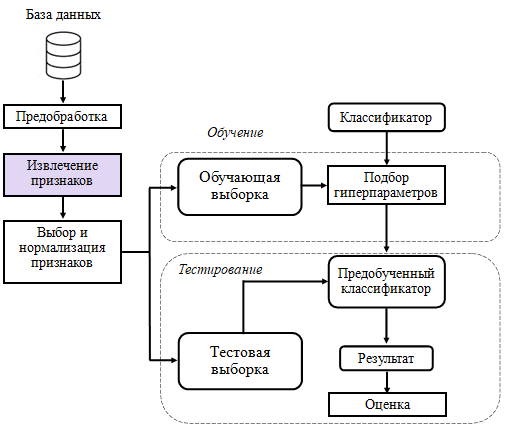

In [ ]:
import numpy as np


## Мешок слов (Bag of Words, BoW)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#корпус предобработанных текстов
Db = ['Вася любит кот',
      'Кот жить улица',
      'Кот любить рыба']

In [ ]:
#векторизуем сразу весь корпус
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(Db).toarray()
X

In [ ]:
#в предобученный векторизатор подаем новый текст
vectorizer.transform(['кот','собака']).toarray()

## TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
Db = ['Вася любит кот',
      'Кот жить улица',
      'Кот любить рыба']

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(Db).toarray()
X

## Word2Vec

In [ ]:
import gensim.downloader as api

word2vec-ruscorpora-300 - word2vec обученный на Russian National Corpus (~ 250M слов), SkipGram с окном 10

В модели "word2vec-ruscorpora-300" после слова указывается часть речи: NOUN (существительное), ADJ (прилагательное) и так далее.

[Другие предобученные эмбеддинги gensim](https://radimrehurek.com/gensim/models/word2vec.html#pretrained-models)

In [ ]:
#загрузка предобученную модель
wv = api.load('word2vec-ruscorpora-300')

In [ ]:
#список слов в данной модели
list(wv.index_to_key)[:10]

In [ ]:
len(list(wv.index_to_key))

In [ ]:
#получение вектора w2v по слову
#wv['человек_NOUN']
wv['человек_NOUN'].shape

In [ ]:
#создание списка слов без частей речи
vocab = []
for w in list(wv.index_to_key):
  vocab.append(w.split('_')[0])

In [ ]:
vocab[:10]

In [ ]:
#вектора каждого слова из предложения
preprocessing_text = ['кот', 'любить', 'тыгыдыкать']
vectors_word = []
for i in preprocessing_text:
  if i in vocab:
    #vocab.index(i) - находит идекс в vocab
    #list(wv.index_to_key)[vocab.index(i)] - выводит слово с его частью речи
    #wv[list(wv.index_to_key)[vocab.index(i)]] - получаем вектор
    vectors_word.append(wv[list(wv.index_to_key)[vocab.index(i)]])
  else:
    vectors_word.append(np.zeros(300))
vector_text = np.mean(vectors_word, axis = 0)

In [ ]:
print(vectors_word)

In [ ]:
print(vector_text)

In [ ]:
#размерность вектора для одного текста (любое кол-во слов) будет 300
vector_text.shape

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')


In [ ]:
file_path = '/content/drive/My Drive/5/12.csv'
df = pd.read_csv(file_path)

In [ ]:
import pandas as pd
num_rows = int(len(df) * 0.2)
df = df.iloc[:num_rows]
print(new_df)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
import pandas as pd
import numpy as np

def process_batch(texts, bow_vectorizer, tfidf_vectorizer, word2vec_model):
    bow_vectors = bow_vectorizer.transform(texts)
    tfidf_vectors = tfidf_vectorizer.transform(texts)


    tokenized_texts = [text.split() for text in texts]
    word2vec_vectors = np.array([
        np.mean([word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv.key_to_index], axis=0)
        if len(tokens) > 0 else np.zeros(100)
        for tokens in tokenized_texts
    ])


    bow_df = pd.DataFrame(bow_vectors.toarray(), columns=[f'bow_{i}' for i in range(bow_vectors.shape[1])])
    tfidf_df = pd.DataFrame(tfidf_vectors.toarray(), columns=[f'tfidf_{i}' for i in range(tfidf_vectors.shape[1])])
    word2vec_df = pd.DataFrame(word2vec_vectors, columns=[f'w2v_{i}' for i in range(100)])

    return pd.concat([bow_df, tfidf_df, word2vec_df], axis=1)

df['text'] = df['text'].fillna('')

bow_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()
bow_vectorizer.fit(df['text'])
tfidf_vectorizer.fit(df['text'])

tokenized_text = df['text'].apply(lambda x: x.split())
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=100, window=5, min_count=1, workers=4)

batch_size = 10
results = []
for batch in np.array_split(df, len(df) // batch_size + 1):
    batch_result = process_batch(batch['text'], bow_vectorizer, tfidf_vectorizer, word2vec_model)
    results.append(batch_result)

vector_df = pd.concat(results, ignore_index=True)
final_df = pd.concat([df.reset_index(drop=True), vector_df], axis=1)



In [ ]:
df.to_csv('complete_text_vectors.csv', index=False)

from google.colab import files

files.download('complete_text_vectors.csv')